In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [23]:
pd.set_option('display.max_columns', 5000000)

In [3]:
sentiment = pd.read_csv("C:\\Users\\scott\\Downloads\\airbnb\\DataX---Banger-Team\\Data\\features_cal_rev.csv")

In [4]:
calendar = pd.read_csv("C:\\Users\\scott\\Downloads\\airbnb\\DataX---Banger-Team\\Data\\calendar.csv")
listings = pd.read_csv("C:\\Users\\scott\\Downloads\\airbnb\\DataX---Banger-Team\\Data\\listings.csv")

In [5]:
calendar['date'] = pd.to_datetime(calendar['date'])

def get_cleaned_price(price: pd.core.series.Series) -> float:
    """ Returns a float price from a pandas Series including the currency """
    return price.str.replace('$', '').str.replace(',', '').astype(float)

calendar['price'] = get_cleaned_price(calendar['price'])

In [6]:
# Group calendar by 'listing_id' and calculate mean 'price'
mean_prices = calendar.groupby('listing_id')['price'].mean().reset_index()

# Merge the mean_prices with sentiment on 'listing_id'
merged_data = pd.merge(mean_prices, sentiment, on='listing_id', how='left')

○	Analyse the relation between the sentiment and price. Were people who paid more also more satisfied?

ANS:there is no evident trend of sentiment score and mean price, so those who paid more do not on average leave better comments

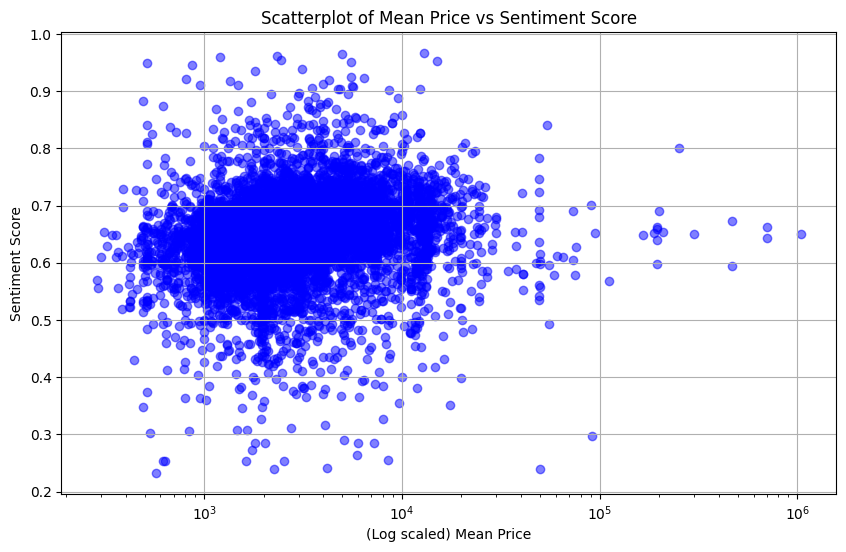

In [8]:
# Plotting the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['price'], merged_data['sentiment_score'], color='blue', alpha=0.5)
plt.title('Scatterplot of Mean Price vs Sentiment Score')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('(Log scaled) Mean Price')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

○	What high seasons did you identify? How do the seasons differ for different locations and estate types?

ANS:There is a clear distinction when it comes to in-season (april,may,june,july,aug,dec) and off-season months (jan,feb,mar,sep,oct,nov), with a distinct price peak in may most likely due to hockey championship taking place.

There is also a clear distinction between weekday and weekend pricing, with Fri and Sat having much higher prices, and Sun (and perhaps even Thu) slightly higher prices than workdays.

The basic trend of dividing between in-season/off-season months and weekend/workdays remains more or less consistent across all neighbourhoods and room types, with inconsistencies occuring mostly due to lower numbers of observations in peripheral locations in Prague.

The weekend pricing does not really apply for Sundays in Hotels and Private rooms, which makes sense when we consider tourists mostly leaving on sundays.

Hotels utilize monthly seasonal price adjustments the most, whereas shared rooms nearly ignore them altogether.

In [21]:
listings.rename(columns={'id': 'listing_id'}, inplace=True)
calendar_new = pd.merge(calendar, listings, on='listing_id', how='left')

In [18]:
calendar_new['busy'] = calendar_new.available.map( lambda x: 0 if x == 't' else 1)

In [14]:
calendar_new = calendar_new.groupby('date')['busy'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])

In [24]:
calendar_new.head()

listing_id       date available  price_x adjusted_price  minimum_nights_x  \
0        3884 2023-09-17         f   1449.0      $1,449.00                 5   
1        3884 2023-09-18         f   1449.0      $1,449.00                 5   
2        3884 2023-09-19         f   1449.0      $1,449.00                 5   
3        3884 2023-09-20         f   1449.0      $1,449.00                 5   
4        3884 2023-09-21         f   1449.0      $1,449.00                 5   

   maximum_nights_x                        listing_url       scrape_id  \
0               365  https://www.airbnb.com/rooms/3884  20230917033704   
1               365  https://www.airbnb.com/rooms/3884  20230917033704   
2               365  https://www.airbnb.com/rooms/3884  20230917033704   
3               365  https://www.airbnb.com/rooms/3884  20230917033704   
4               365  https://www.airbnb.com/rooms/3884  20230917033704   

  last_scraped           source  \
0   2023-09-17  previous scrape   
1   2023-09-17  previous scrape   
2   2023-09-17  previous scrape   
3   2023-09-17  previous scrape   
4   2023-09-17  previous scrape   

                                                name  \
0  Rental unit in Prague · 1 bedroom · 2 beds · 1...   
1  Rental unit in Prague · 1 bedroom · 2 beds · 1...   
2  Rental unit in Prague · 1 bedroom · 2 beds · 1...   
3  Rental unit in Prague · 1 bedroom · 2 beds · 1...   
4  Rental unit in Prague · 1 bedroom · 2 beds · 1...   

                                         description  \
0  <b>The space</b><br />for detailed info see ht...   
1  <b>The space</b><br />for detailed info see ht...   
2  <b>The space</b><br />for detailed info see ht...   
3  <b>The space</b><br />for detailed info see ht...   
4  <b>The space</b><br />for detailed info see ht...   

                               neighborhood_overview  \
0  Surpricing quiet atmosphere,  the street is cl...   
1  Surpricing quiet atmosphere,  the street is cl...   
2  Surpricing quiet atmosphere,  the street is cl...   
3  Surpricing quiet atmosphere,  the street is cl...   
4  Surpricing quiet atmosphere,  the street is cl...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/8072/27c136d4...     3128   
1  https://a0.muscache.com/pictures/8072/27c136d4...     3128   
2  https://a0.muscache.com/pictures/8072/27c136d4...     3128   
3  https://a0.muscache.com/pictures/8072/27c136d4...     3128   
4  https://a0.muscache.com/pictures/8072/27c136d4...     3128   

                                 host_url host_name  host_since host_location  \
0  https://www.airbnb.com/users/show/3128    Regina  2008-09-23           NaN   
1  https://www.airbnb.com/users/show/3128    Regina  2008-09-23           NaN   
2  https://www.airbnb.com/users/show/3128    Regina  2008-09-23           NaN   
3  https://www.airbnb.com/users/show/3128    Regina  2008-09-23           NaN   
4  https://www.airbnb.com/users/show/3128    Regina  2008-09-23           NaN   

                                          host_about host_response_time  \
0  Welcome* Willkommen* Benvenuto* Bienvenida* Ac...                NaN   
1  Welcome* Willkommen* Benvenuto* Bienvenida* Ac...                NaN   
2  Welcome* Willkommen* Benvenuto* Bienvenida* Ac...                NaN   
3  Welcome* Willkommen* Benvenuto* Bienvenida* Ac...                NaN   
4  Welcome* Willkommen* Benvenuto* Bienvenida* Ac...                NaN   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                NaN                  NaN                 f   
1                NaN                  NaN                 f   
2                NaN                  NaN                 f   
3                NaN                  NaN                 f   
4                NaN                  NaN                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/users/3128/profile_...   
1  https://a0.muscache.com/im/users

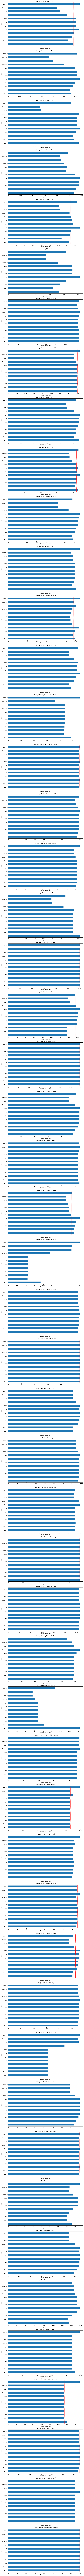

In [35]:
# Find unique neighborhoods
neighborhoods = calendar_new['neighbourhood_cleansed'].unique()

# Create a figure and axes for each neighborhood
fig, axes = plt.subplots(nrows=len(neighborhoods), ncols=1, figsize=(12, 7 * len(neighborhoods)))

# Check if there is only one neighborhood to avoid indexing error
if len(neighborhoods) == 1:
    axes = [axes]

# Create a list of month names in correct order for later mapping
months = [pd.to_datetime(f'{i}', format='%m').strftime('%B') for i in range(1, 13)]

for ax, neighborhood in zip(axes, neighborhoods):
    # Filter data for the current neighborhood
    subset = calendar_new[calendar_new['neighbourhood_cleansed'] == neighborhood]
    
    # Group by month number and calculate mean price
    mean_per_month = subset.groupby(subset['date'].dt.month)['price_x'].mean()
    
    # Map the index (which is currently month numbers) to month names
    mean_per_month.index = mean_per_month.index.map(lambda x: months[x-1])
    
    # Sort the mean prices to find the cut-off point between the top 6 and bottom 6 months
    sorted_means = mean_per_month.sort_values()
    
    # Calculate the average price at the 6th and 7th month boundary
    cut_off_price = sorted_means.iloc[5:7].mean()

    # Plotting
    mean_per_month.plot(kind='barh', ax=ax)
    
    # Add a vertical line to cut off the top 6 from the bottom 6 months
    ax.axvline(x=cut_off_price, color='red', linestyle='--', linewidth=1)
    
    ax.set_title(f'Average Monthly Price in {neighborhood}')
    ax.set_xlabel('Average Monthly Price')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

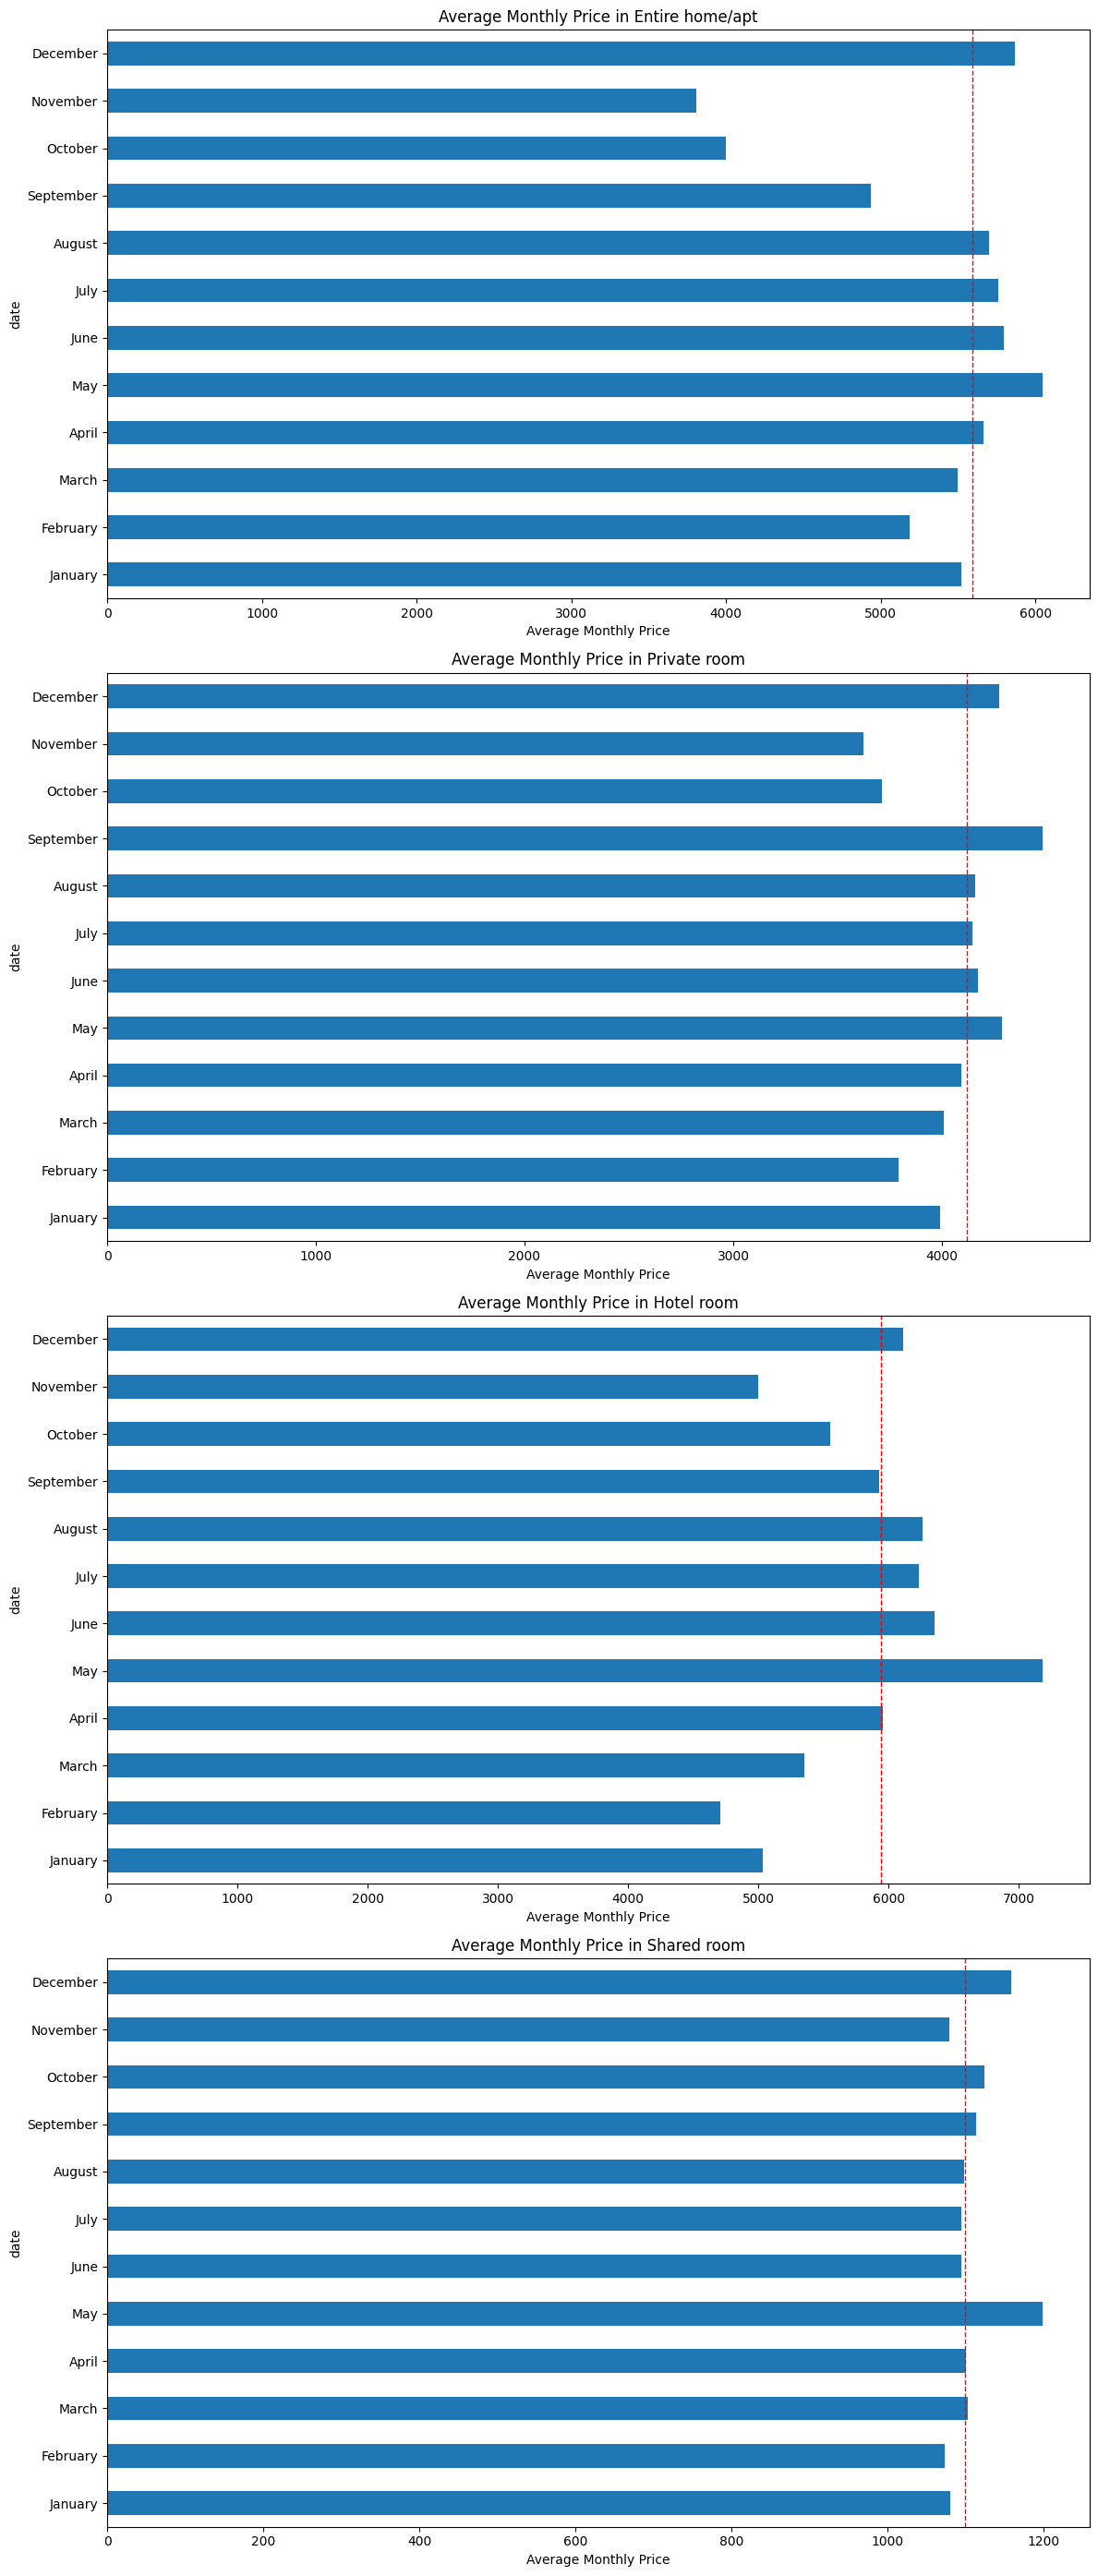

In [26]:
# Find unique neighborhoods
neighborhoods = calendar_new['room_type'].unique()

# Create a figure and axes for each neighborhood
fig, axes = plt.subplots(nrows=len(neighborhoods), ncols=1, figsize=(12, 7 * len(neighborhoods)))

# Check if there is only one neighborhood to avoid indexing error
if len(neighborhoods) == 1:
    axes = [axes]

# Create a list of month names in correct order for later mapping
months = [pd.to_datetime(f'{i}', format='%m').strftime('%B') for i in range(1, 13)]

for ax, neighborhood in zip(axes, neighborhoods):
    # Filter data for the current neighborhood
    subset = calendar_new[calendar_new['room_type'] == neighborhood]
    
    # Group by month number and calculate mean price
    mean_per_month = subset.groupby(subset['date'].dt.month)['price_x'].mean()
    
    # Map the index (which is currently month numbers) to month names
    mean_per_month.index = mean_per_month.index.map(lambda x: months[x-1])
    
    # Sort the mean prices to find the cut-off point between the top 6 and bottom 6 months
    sorted_means = mean_per_month.sort_values()
    
    # Calculate the average price at the 6th and 7th month boundary
    cut_off_price = sorted_means.iloc[5:7].mean()

    # Plotting
    mean_per_month.plot(kind='barh', ax=ax)
    
    # Add a vertical line to cut off the top 6 from the bottom 6 months
    ax.axvline(x=cut_off_price, color='red', linestyle='--', linewidth=1)
    
    ax.set_title(f'Average Monthly Price in {neighborhood}')
    ax.set_xlabel('Average Monthly Price')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

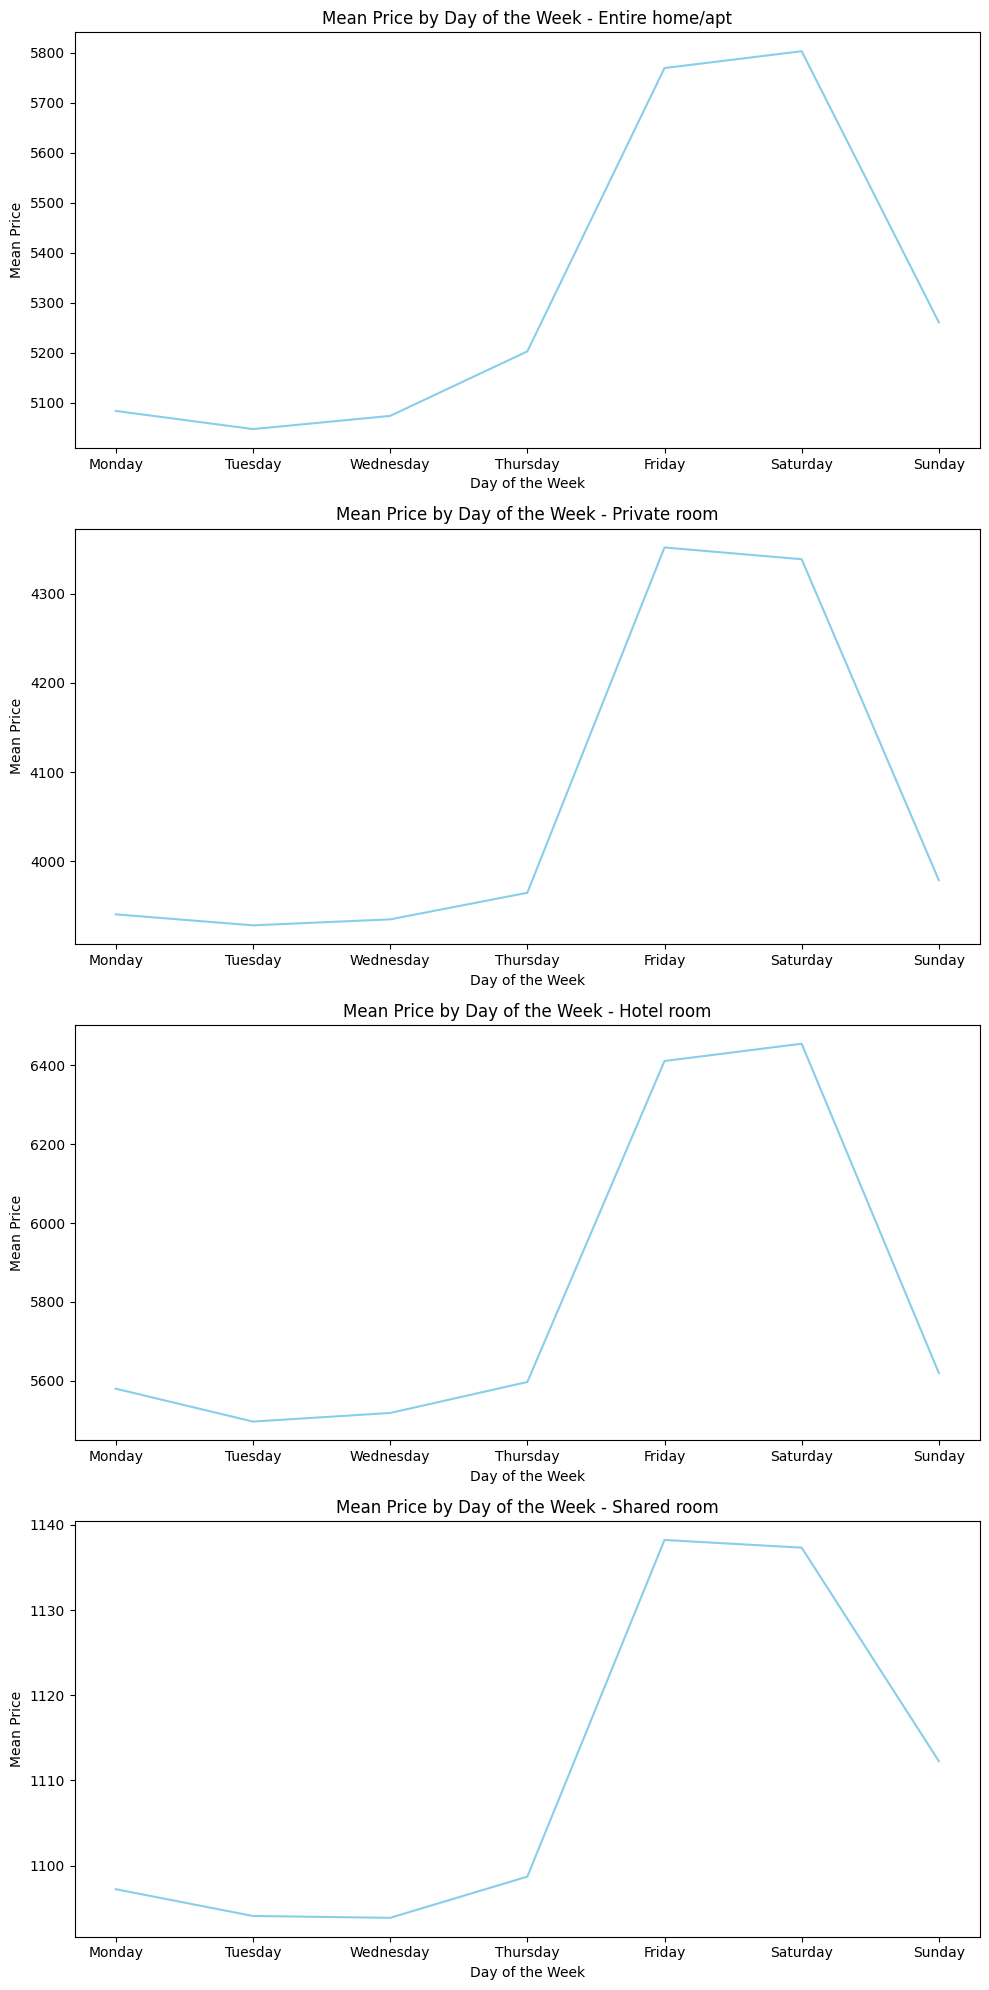

In [33]:
# Convert 'date' to day of the week
calendar_new['day_of_week'] = calendar_new['date'].dt.day_name()

# Find unique room types
room_types = calendar_new['room_type'].unique()

# Create a figure and axes for each room type
fig, axes = plt.subplots(nrows=len(room_types), ncols=1, figsize=(10, 5 * len(room_types)))

# Check if there is only one room type to avoid indexing error
if len(room_types) == 1:
    axes = [axes]

# Order of days to sort the plot consistently
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for ax, room_type in zip(axes, room_types):
    # Filter data for the current room type
    subset = calendar_new[calendar_new['room_type'] == room_type]
    
    # Group by day of the week and calculate mean price
    mean_price_by_day = subset.groupby('day_of_week')['price_x'].mean().reindex(day_order)
    
    # Plotting
    mean_price_by_day.plot(kind='line', ax=ax, color='skyblue')
    
    ax.set_title(f'Mean Price by Day of the Week - {room_type}')
    ax.set_ylabel('Mean Price')
    ax.set_xlabel('Day of the Week')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

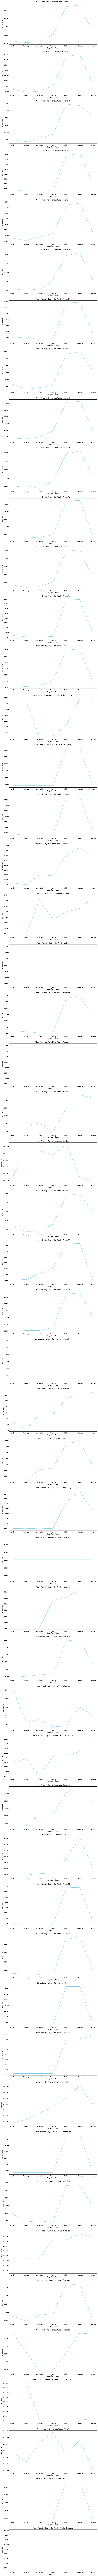

In [34]:
# Convert 'date' to day of the week
calendar_new['day_of_week'] = calendar_new['date'].dt.day_name()

# Find unique room types
room_types = calendar_new['neighbourhood_cleansed'].unique()

# Create a figure and axes for each room type
fig, axes = plt.subplots(nrows=len(room_types), ncols=1, figsize=(10, 5 * len(room_types)))

# Check if there is only one room type to avoid indexing error
if len(room_types) == 1:
    axes = [axes]

# Order of days to sort the plot consistently
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for ax, room_type in zip(axes, room_types):
    # Filter data for the current room type
    subset = calendar_new[calendar_new['neighbourhood_cleansed'] == room_type]
    
    # Group by day of the week and calculate mean price
    mean_price_by_day = subset.groupby('day_of_week')['price_x'].mean().reindex(day_order)
    
    # Plotting
    mean_price_by_day.plot(kind='line', ax=ax, color='skyblue')
    
    ax.set_title(f'Mean Price by Day of the Week - {room_type}')
    ax.set_ylabel('Mean Price')
    ax.set_xlabel('Day of the Week')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()